In [2]:
import sys
sys.path.append('../')

In [3]:
import seaborn as sns
from config import const


sns.set_theme()
customPalette = sns.set_palette(sns.color_palette(const.colors))


In [4]:
import pandas as pd

sample = pd.read_csv('../data/raw/sample.csv')
sample['Start_Time'] = sample['Start_Time'].str.replace(r'\.\d{3,}', '', regex=True)
sample['Start_Time'] = pd.to_datetime(sample['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

sample['End_Time']   = sample['End_Time'].str.replace(r'\.\d{3,}', '', regex=True)
sample['End_Time']   = pd.to_datetime(sample['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

sample['year']       = sample['Start_Time'].dt.strftime("%Y").astype(int)
sample['md']         = sample['Start_Time'].dt.strftime("%m-%d")


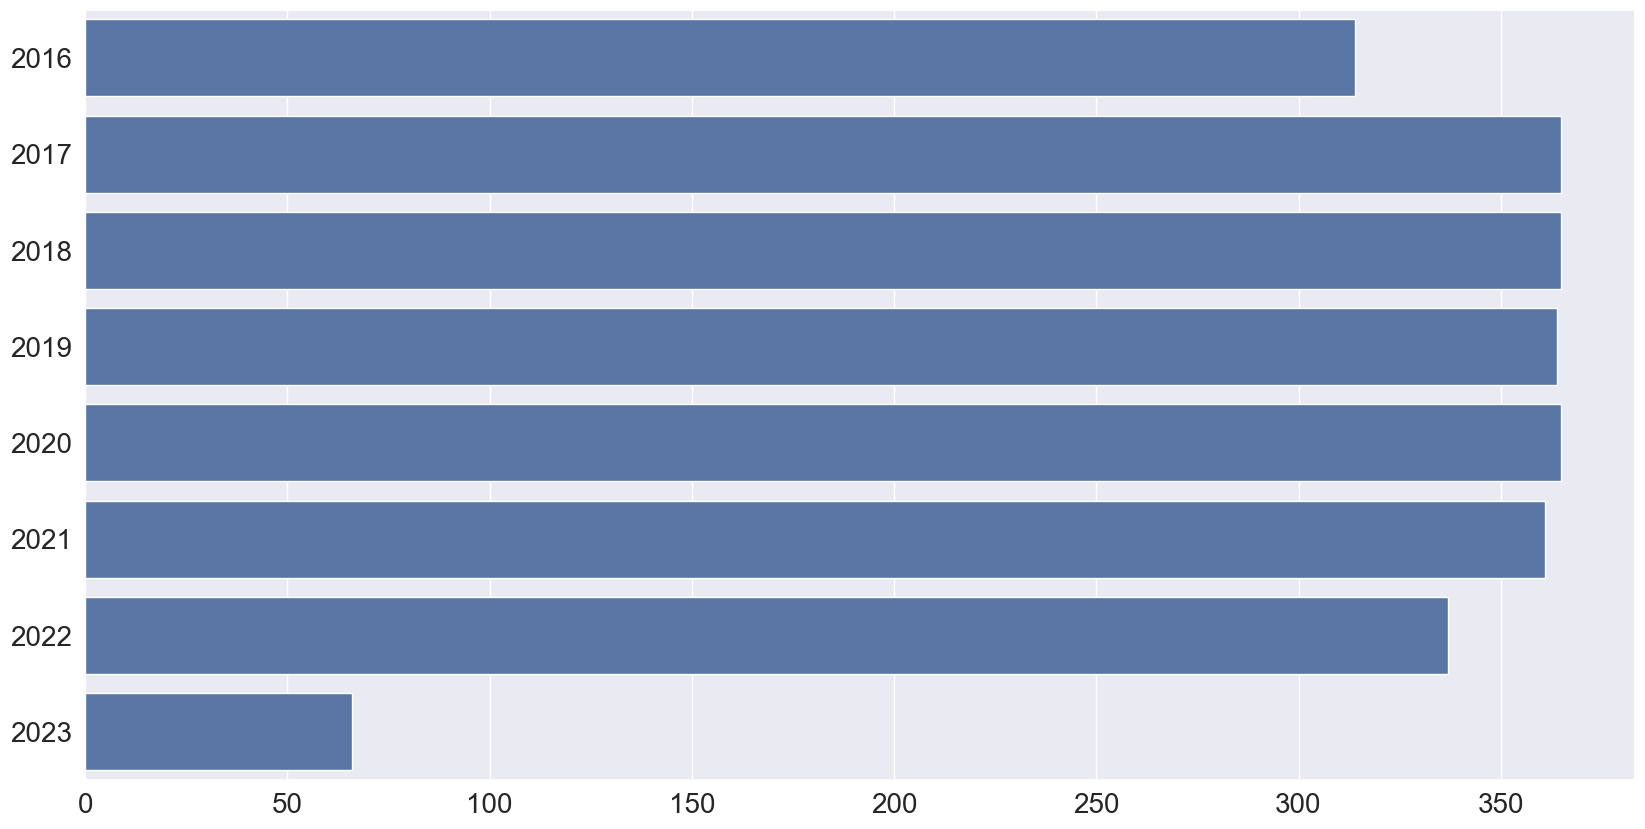

In [5]:
import matplotlib.pyplot as plt

xx = (
    sample
    .groupby(['year'])
    ['md'].nunique()
    .reset_index()
    .sort_values('year', ascending=True)
)
xx
# # xx.set_index('year').transpose()

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=xx, x='md', y='year', orient='h', palette=customPalette)

plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=20)  # Adjust the font size as needed
plt.yticks(fontsize=20)  # Adjust the font size as needed
plt.show()



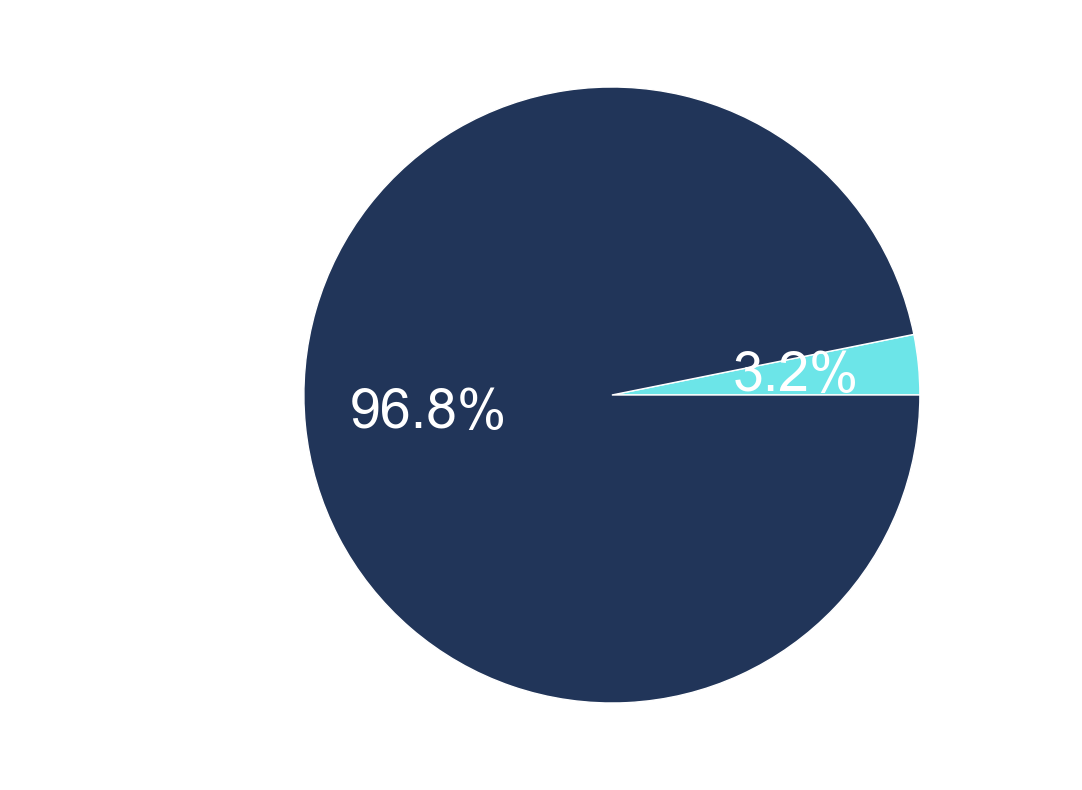

In [6]:
import matplotlib.pyplot as plt
total_row_2023 = len(sample[sample['year'] == 2023])
total_row = len(sample)
 
# create data
names = ['2023', '2016-2022']
size = [total_row_2023,total_row - total_row_2023]
 
# Create a circle at the center of the plot
sns.set(style="whitegrid")
# Give color names
plt.pie(size, labels=names, colors=[const.colors[-1], const.colors[0]], autopct='%1.1f%%', textprops={'fontsize': 40, 'color': 'white'})
# plt.legend(names, loc='upper left')
# plt.setp(plt.gca().get_legend().get_texts(), color='white')

# Show the graph
plt.show()

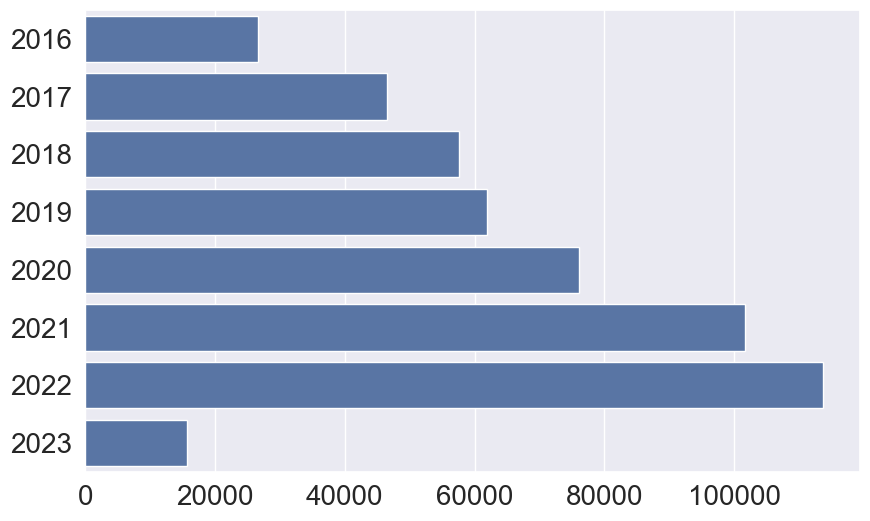

In [15]:
xx = (
    sample
    .groupby('year')
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
    .sort_values('year', ascending=False)
)

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x=xx['count'], y=xx['year'], orient='h')

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

In [8]:
sample['m']         = sample['Start_Time'].dt.strftime("%m")
sample['d']         = sample['Start_Time'].dt.strftime("%d")
(
    sample[sample['year'] == 2016]
    .groupby(['m'])
    ['d'].nunique()
    .reset_index()
)

,m,d
0,01,1
1,02,16
2,03,28
3,04,29
4,05,28
5,06,29
6,07,31
7,08,31
8,09,30
9,10,30


In [9]:
traffic_impact = pd.read_pickle('../data/processed/traffic_impact.pickle')
traffic_impact

,ID,Severity,Distance(m)
0,A-2047758,2,0.0
1,A-4694324,2,90.1
2,A-5006183,2,35.4
3,A-4237356,2,1696.2
4,A-6690583,2,74.0
...,...,...,...
499995,A-6077227,2,254.3
499996,A-6323243,2,64.4
499997,A-3789256,2,883.5
499998,A-7030381,3,0.0


In [10]:
traffic_impact['Severity'].median()

2.0

In [11]:
traffic_impact['Distance(m)'].median()

32.2